## FILTRO MORFOLÓGICO PARA CONTAR OBJETOS EN IMAGEN

### Autores:
**IÑIGO BLAZQUEZ TATIEGI, LUIS GARCIA TISCAR ,GUILLERMO BOTANA NOVILLO-FERTRELL y ALBERTO JIMENEZ SANCHEZ**

El objetivo de este notebook es identificar y contar cuantos objetos se encuentran en una imagen. Para ello, primero se segmenta la imagen y después se utilizan operaciones morfológicas para separar los objetos de la imagen y eliminar ruido. Para terminar, se le aplica una función para contar los objetos que se encuentran en la imagen.

Antes de comenzar con la descripción del funcionamiento del filtro, realizaremos un breve repaso de las funciones morfológicas más usadas con una imagen de ejemplo.

## TEORÍA

Los filtros morfológicos utilizan un **elemento estructural**, un elemento matricial (mínimo de 3x3 píxeles) sobre el cual los operadores morfológicos actúan mientras recorre la imagen de forma iterativa. Dicho elemento puede tener diversas formas según la aplicación que necesitemos (cuadrado, elíptico, en forma de diamante, etc.)

**Operadores morfológicos:**

Los operadores básicos y fundamentales de la matemática morfológica son:

**Dilatación:** Consiste en potenciar y aumentar los contornos de una imagen binaria, haciendo que los detalles se magnifiquen e, incluso, fusionando elementos de una imagen que originalmente estaban separados. Comprueba píxel a píxel qué relación tienen el EE y la imagen original. Si ambos coinciden, al menos en un píxel, el operador "grabará" en la imagen el EE, haciendo que los píxeles de los contornos aumenten, mientras el interior permanece constante. Ejemplo:

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import erosion,dilation,opening,closing
from skimage.morphology import disk, diamond, ball, rectangle, star, square
from skimage import io
import Funciones as f

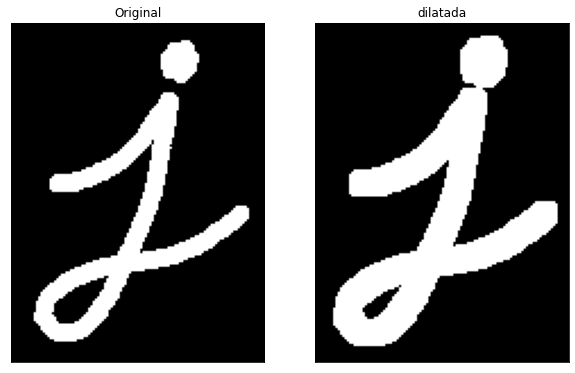

-1

In [2]:
j = cv2.imread('j.png',1) #imagen original
kernel = np.ones((5,5),np.uint8) #EE
dilatada = cv2.dilate(j,kernel,iterations = 1) #resultado de aplicar dilatación

f.showImages(j,'Original',dilatada,'dilatada')
cv2.waitKey(0)

**Erosión:**: Elimina detalles, reduce contornos y, en algunos casos, desune objetos. También se implementa de forma iterativa píxel a píxel pero este operador comprueba si el EE está contenido en la imagen original y se queda únicamente donde ambos elementos coincidan. De esta manera, la imagen se reduce. 

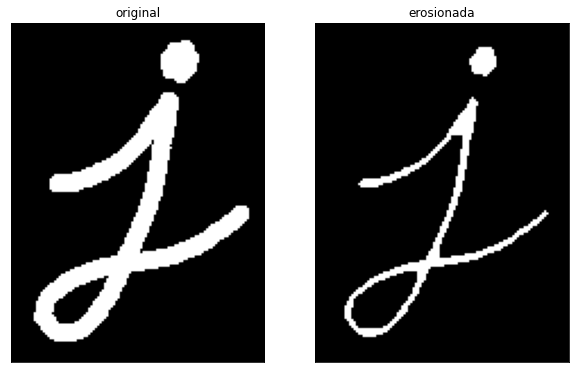

-1

In [3]:
erosionada=cv2.erode(j,kernel,iterations = 1)
f.showImages(j,'original',erosionada,'erosionada')
cv2.waitKey(0)

**Operadores combinación de erosión y dilatación:** 

**Opening:** Un uso muy habitual de los dos operadores básicos es utilizar primero la erosión, puesto que elimina ruido de la imagen, y después dilatación, ya que el ruido ha desaparecido pero la imagen se ha empequeñecido. A este proceso se le denomina apertura (u opening en inglés).

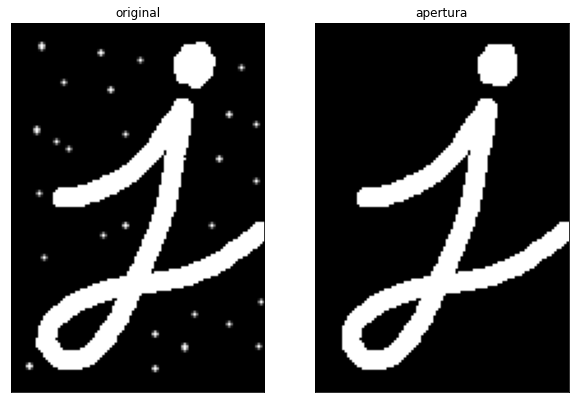

-1

In [4]:
j_noise=cv2.imread('opening.png',1)
apertura = cv2.morphologyEx(j_noise, cv2.MORPH_OPEN, kernel)
f.showImages(j_noise,'original',apertura,'apertura')
cv2.waitKey(0)

**Closing:** El proceso contrario se denomina clausura (closing en inglés). Primero realiza una dilatación de la imagen original y después una erosión. Se emplea para reafirmar y consolidar formas dentro de una imagen. También se suele utilizar para "cerrar" pequeños agujeros de ruido en la imagen:

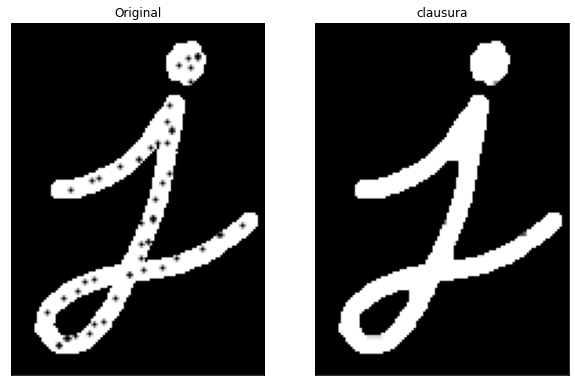

-1

In [5]:
j_closing=cv2.imread('j_closing.png',1)
clausura = cv2.morphologyEx(j_closing, cv2.MORPH_CLOSE, kernel)
f.showImages(j_closing,'Original',clausura,'clausura')
cv2.waitKey(0)

**Gradiente morfológico:** Es la diferencia entre la dilatación y la erosión, se utiliza para detectar bordes en la imagen.

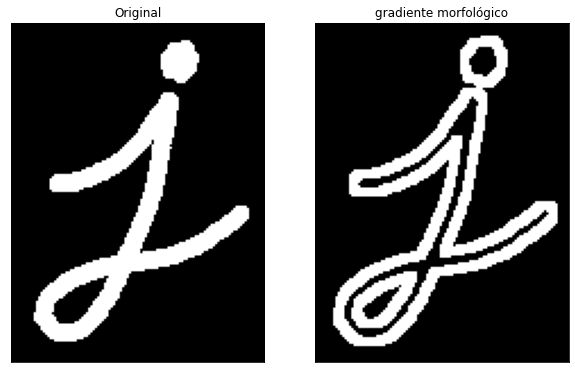

-1

In [6]:
gradiente = cv2.morphologyEx(j, cv2.MORPH_GRADIENT, kernel)
f.showImages(j,'Original',gradiente,'gradiente morfológico')
cv2.waitKey(0)

**Top Hat:** El operador Top Hat se define como la diferencia entre la imagen original y el operador morfológico apertura. Este operador se usa para centrarse en los detalles de una imagen. Además, es muy útil para destacar objetos brillantes en fondos oscuros.

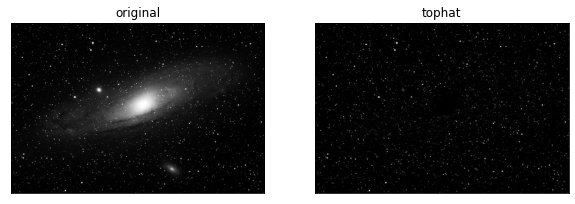

In [7]:
glx=cv2.imread('galaxy.png',1)
tophat = cv2.morphologyEx(glx, cv2.MORPH_TOPHAT, kernel)
f.showImages(glx,'original',tophat,'tophat')

**Black Hat:** Se usa para la operación contraria a Top Hat, destacar objetos oscuros de interés en fondos brillantes

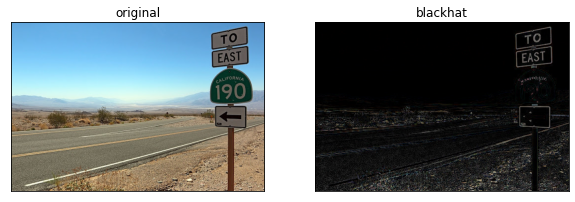

In [8]:
cartel=cv2.imread('cartel.jpg')
blackhat = cv2.morphologyEx(cartel,cv2.MORPH_BLACKHAT,kernel) 
f.showImages(cartel,'original',blackhat,'blackhat')

Repasados las funciones más usadas y los ejemplos, damos paso a una descripción de la ejecución del algoritmo paso a paso:

Se han utilizado dos imágenes para visualizar el funcionamiento del código desarrollado. Una imagen contiene varias monedas y otra imagen contiene varias canicas.

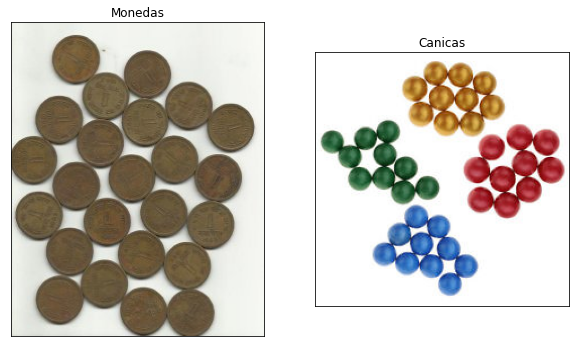

In [9]:
img_monedas = cv2.imread('coins.jpg')
img_canicas = cv2.imread('canicas2.jpg')

f.showImages(img_monedas,"Monedas",img_canicas,"Canicas")

## Contando la cantidad de monedas

A continuación, lo que vamos a hacer es segmentar estas imágenes mediante el método Otsu. Éste método, al contrario que el método de segmentación global de OpenCV en el que tenemos que definir un valor umbral para realizar la segmentación, lo que hace es encontrar el valor umbral óptimo a partir del histograma de las imágenes en escala de grises que recibe. Devuelve dos outputs: el valor umbral óptimo encontrado (ret) y la imagen segmentada con dicho valor (th):

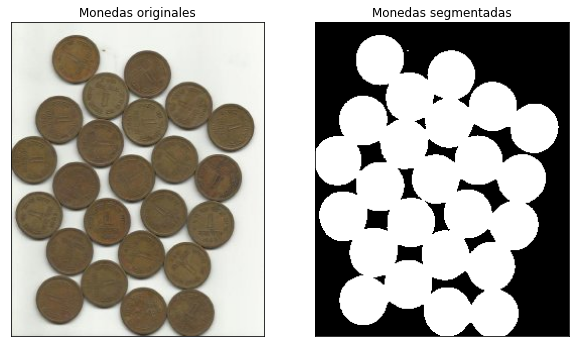

In [10]:
# Por lo tanto, pasamos de BGR a escala de grises
gray_monedas = cv2.cvtColor(img_monedas,cv2.COLOR_BGR2GRAY)

# Aplicamos Otsu
ret_monedas, thresh_monedas = cv2.threshold(gray_monedas,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
f.showImages(img_monedas,"Monedas originales",thresh_monedas,"Monedas segmentadas")


Ahora utilizamos la operación morfológica de erosión para realizar dos funciones distintas. Por un lado, mediante esta operación eliminamos ruido que puede haber en la imagen y por otro, separamos los objetos que se encuentran en la imagen. Para realizar la erosión se ha utilizado el elemento estructural de disco.

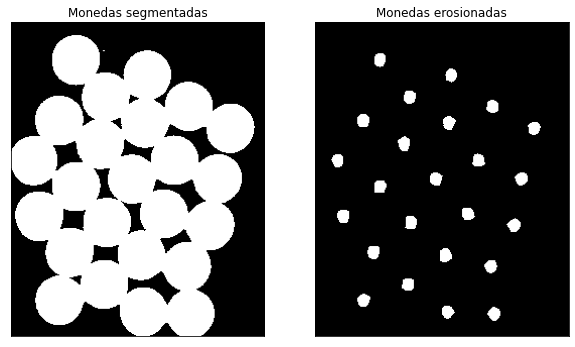

In [11]:
erosion_monedas=erosion(thresh_monedas,disk(18))
f.showImages( thresh_monedas,"Monedas segmentadas",erosion_monedas,"Monedas erosionadas")

Por último, mediante la función getNumCirclesn se cuentan las monedas que hay en la imagen, esto se hace contando los puntos que se encuentran en la imagen.

In [12]:
cont=f.getNumCircles(erosion_monedas.copy())
print("Número de monedas que se encuentran en la imagen: ",cont)

Número de monedas que se encuentran en la imagen:  24


## Contando la cantidad de canicas

El proceso es análogo al de las monedas:

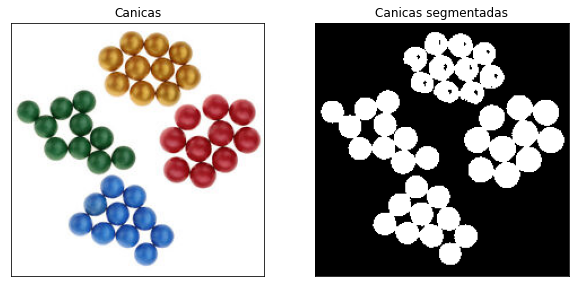

In [13]:
gray_canicas = cv2.cvtColor(img_canicas,cv2.COLOR_BGR2GRAY)
ret_canicas, thresh_canicas = cv2.threshold(gray_canicas,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
f.showImages(img_canicas,"Canicas",thresh_canicas,"Canicas segmentadas")    

En la imagen segmentada se puede ver que si aplicamos la erosión se podrían borrar algunas canicas porque se puede apreciar ruido dentro de las canicas de la parte superior de la imagen. Por ello, se ha utilizado primero la dilatación y después la erosión para separar los objetos y eliminar el ruido. Como hemos descrito en teoría, este proceso se denomina clausura o closing. En este caso, para hacer ambas operaciones se ha utilizado un rectángulo como elemento estructural pero de distinto tamaño en cada una.

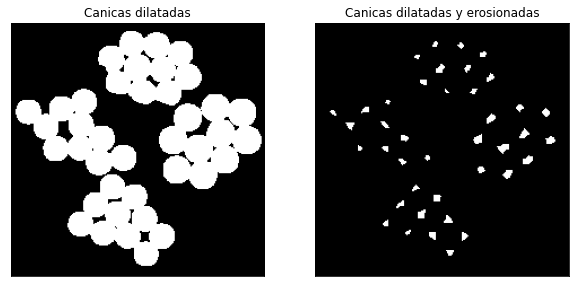

In [14]:
canicas_dilation=dilation(thresh_canicas,rectangle(3,3))
# Ahora erosionamos la imagen mediante el mismo elemento estructurador pero de mayor tamaño, por ejemplo, 5x
canicas_erosion=erosion(canicas_dilation,rectangle(15,15))
f.showImages( canicas_dilation,"Canicas dilatadas",canicas_erosion,"Canicas dilatadas y erosionadas")


Por último, mediante la función getNumCirclesn se cuentan las monedas que hay en la imagen, esto se hace contando los puntos que se encuentran en la imagen.

In [15]:
cont=f.getNumCircles(canicas_erosion.copy())
print("Número de canicas que se encuentran en la imagen ",cont)


Número de canicas que se encuentran en la imagen  40


## DISEÑO DEL FILTRO COMO FUNCIÓN

## Ejemplo de uso

Aunque tengamos el filtro implementado en este mismo notebook, hemos creado un archivo .py llamado Funciones con todas las funciones creadas que se usan en este notebook para una implementación externa a este proyecto. Importaremos la función como si no estuviera aquí y la usaremos para contar las monedas.

Número de canicas que se encuentran en la imagen:  40


40

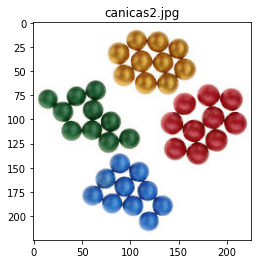

In [16]:
f.contar('canicas2.jpg',3,'rectangle',dilate=True,mult=5)

### Control de la actividad grupal

FECHA | HORA DE INICIO | HORA DE FIN | HITOS  
------------ | ------------- | ------------- | -------------
26/01/2021 | 10:00 | 12:00 | Se escogió el problema a resolver y se organizaron las tareas
29/01/2021 | 12:00 | 14:00 | De las 4 soluciones se escogieron la de Luis y la de Íñigo. Se finalizó el notebook

. | IÑIGO BLAZQUEZ TATIEGI | LUIS GARCIA TISCAR | GUILLERMO BOTANA NOVILLO-FERTRELL | ALBERTO JIMENEZ SANCHEZ | 
------------ | ------------- | ------------- | ------------- | -------------
Asistencia a reuniones de equipo por cada integrante | 2 reuniones | 2 reuniones | 2 reuniones | 2 reuniones
Tareas o entregas a realizar por cada miembro del equipo | 2 tareas | 2 tareas | 2 tareas | 2 tareas